## COMP47670: Assignment 2

**Name:** Stefan Manek

**Student No:** 17379451

In [1]:
#Importing libraries
import urllib.request
from bs4 import BeautifulSoup
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Task 1: Data Collection

First task was to collect data on newspaper articles from the 12 months of 2020. For each article, the title, text snippet summarising its contents, and its news category were to be saved and stored locally in an appropriate format.

Firstly, various functions were written to aid in the parsing of the html of the given webpage and extract the required information.

In [2]:
def get_raw_html(link):
    """Function returns html code from webpage link"""
    response = urllib.request.urlopen(link)
    html = response.read().decode()
    return html

def get_months(soup):
    """Input: Soup of main webpage
    
    Output: List of month link urls"""
    links = []
    month_list = soup.find_all("a", {"class":'list-group-item list-group-item-action'})
    for month in month_list:
        month_link = month['href']
        links.append(month_link)
    return links

def find_page_numbers(month_soup):
    """Returns number of pages in month archive"""
    pages = month_soup.find('h4').text.split(' ')[-1]
    return pages.zfill(2)

def new_month_str(month_str, page_num):
    """Returns month link with updated page number"""
    page_num = page_num.zfill(2)
    parts = month_str.split('-')
    num_part = parts[2]
    num_parts = list(num_part)
    
    num_parts[1:3] = page_num[:2]
    num_part = ''.join(num_parts)
    return '-'.join([parts[0], parts[1], num_part])

def find_category(article_soup):
    """Extracts category from all articles on specific page"""
    possible_entries = article_soup.find_all('p', class_='metadata')
    for entry in possible_entries:
        if 'Category' in entry.text:
            category_string = entry.text
            #Removing 'Category: ' from string
            category = category_string.split(':')[-1].strip()
    return category

def extract_data(article_soup):
    """Input: soup from specific article
    
    Ouput: dictionary containing title, category and snippet from article"""
    title = article_soup.find('a').text
    snippet = article_soup.find('p', class_='snippet').text
    category = find_category(article_soup)
    return {'Title' :title,
            'Snippet' : snippet,
            'Category' : category}

Using the above functions; each month, as well as all the given pages in each month were parsed, with the title, snippet and category for each article extracted and placed in a dictionary. These dictionaries were saved in list format to store all the required article details.

In [3]:
#Re-doing for all tabs

def scape_news_data(link):
    """Function to scrape all articles from the specified link
    
    Output: List of details from all articles including its title, text snippet and news category"""
    details_list = []
    raw_html = get_raw_html(link)
    main_soup = BeautifulSoup(raw_html, "html.parser")
    month_link_list = get_months(main_soup)
    #Looping through all nine month urls
    for month_link in month_link_list:
        split_link = link.split('/')
        split_link[-1] = month_link
        full_month_link = '/'.join(split_link)
        
        month_html = get_raw_html(full_month_link)
        month_soup = BeautifulSoup(month_html, "html.parser")
        
        number_of_pages = find_page_numbers(month_soup)
        #Looping through all pages for each month
        for num in range(1, int(number_of_pages)+1):
            
            #Put in function
            month_str = new_month_str(month_link, str(num).zfill(2))
            split_link = link.split('/')
            split_link[-1] = month_str
            full_month_link = '/'.join(split_link)
            #Print statement to ensure all links are being recognised
            print('Retrieving data from:' + full_month_link)
            month_html = get_raw_html(full_month_link)
            month_soup = BeautifulSoup(month_html, "html.parser")
            
            all_articles = month_soup.find_all('div', class_='article')
            #Looping through all articles on each page
            for article in all_articles:
                details = extract_data(article)
                details_list.append(details)
    return details_list

article_details = scape_news_data('http://mlg.ucd.ie/modules/COMP41680/assignment2/index.html')

Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-001.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-002.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-003.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-004.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-005.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-006.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-007.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-008.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-009.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-010.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-011.html
Retrieving data from:http://mlg.

Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-007.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-008.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-009.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-010.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-011.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-012.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-013.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-014.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-015.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-016.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-017.html
Retrieving data from:http://mlg.

Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-021.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-022.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-023.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-024.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-025.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-026.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-027.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-028.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-001.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-002.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-003.html
Retrieving data from:http://mlg.

Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-007.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-008.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-009.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-010.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-011.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-012.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-013.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-014.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-015.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-016.html
Retrieving data from:http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-017.html
Retrieving data from:http://mlg.

The extraced data was then saved to a JSON file for easy access:

In [5]:
def save_json(data, filename):
    """Simple function to save data in JSON format"""
    out_file = open(filename, "w")

    json.dump(data, out_file, indent = 6)

    out_file.close()
    return data

save_json(article_details, 'news_data.json')

[{'Title': "Let's resolve to reconnect, says Welby in new year message",
  'Snippet': 'The archbishop of Canterbury will urge people to make personal connections with others in 2020 to create a new unity in a divided society. In his new …',
  'Category': 'UK-News'},
 {'Title': "Be honest. You're not going to read all those books on your holiday, are you?",
  'Snippet': 'Every year, about this time, my Instagram feed fills up with pictures of books. They’re piled somewhere between five and ten inches high, sometimes st …',
  'Category': 'Books'},
 {'Title': "Mariah Carey's Twitter account hacked on New Year's Eve",
  'Snippet': 'Mariah Carey’s Twitter account appeared to have been hacked late Tuesday afternoon, sharing numerous racist slurs and comments with the singer’s 21.4 …',
  'Category': 'Music'},
 {'Title': 'The joy audit: how to have more fun in 2020',
  'Snippet': 'The last time I felt joy was at an event that would be many people’s vision of hell: a drunken Taylor Swift club-n

### Task 2: Binary Text Classification

The saved data from the data collection step is read in from its saved JSON file.

In [6]:
def read_json(filename):
    """Simple function to retrieve data saved in JSON format"""
    f = open(filename)
    data = json.load(f)
    f.close()
    return data

news_data = read_json('news_data.json')

The three news categories to perform the analysis were chosen to be **UK-News**, **US-News**, and **Sport**. As this task was to perform binary classification, the three possible category pairs were analysed individually. 

For all the articles in each category pair, the text in the title and snippet were combined in lower case and saved as the document, with their categories saved as targets using the functions below:

In [7]:
def concatentate_strings(str1, str2):
    full_string = (str1 + ' ' + str2).lower()
    return full_string

def extract_relevant_articles(data, category0, category1):
    targets = []
    documents = []
    for article in data:
        if article['Category'] in [category0, category1]:
            documents.append(concatentate_strings(article['Title'], article['Snippet']))
            targets.append(article['Category'])
    return np.array(targets), documents

### Initial Analysis

The first pair chosen was **UK-** and **US-News**, where their target and document values were saved in arrays below:

In [8]:
target, docs = extract_relevant_articles(news_data, 'UK-News', 'US-News')

The relevant functions and modules from Scikit-learn were imported for the analysis:

In [9]:
#Importing modules:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import train_test_split

%matplotlib inline

In order to evaluate the performance of the classification model, the extracted documents were split into training and testing sets using the train_test_split function, where the test size was set to 10%:

In [10]:
train_docs, test_docs, train_target, test_target = train_test_split(docs, target, test_size=0.1)

In [11]:
target_names = list(np.unique(train_target))

The next step in the process was to create a document-term matrix for the two selected categories, which was done using the simple CountVectorizer function, which was used to filter out common English stop-words and also tokens which appeared in fewer than 10 documents. The number of unique terms is also displayed below:

In [12]:
vectorizer = CountVectorizer(stop_words="english",min_df = 10)
D_T_matrix = vectorizer.fit_transform(train_docs)

terms = vectorizer.get_feature_names()
print("Training documents contain %d distinct terms" % len(terms))

Training documents contain 1279 distinct terms


The 15 highest occurring terms from the matrix are displayed below:

In [15]:
#Frequencies of each term in the matrix:
freqs = D_T_matrix.sum(axis=0)

#Sort by highest term frequency
sorted_term_indices = freqs.argsort()
sorted_term_indices = sorted_term_indices[0, ::-1]

#Print 15 highest terms including their frequency
for i in range(15):
    term_index = sorted_term_indices[0,i]
    print("%d. %s = %.0f" % ((i+1), terms[term_index], freqs[0,term_index] ))

1. trump = 1114
2. summary = 617
3. police = 530
4. donald = 503
5. coronavirus = 487
6. new = 393
7. uk = 386
8. covid = 369
9. biden = 362
10. people = 283
11. man = 262
12. year = 250
13. 19 = 249
14. joe = 248
15. election = 242


A k-Nearest Neighbour model was then created to classify the withheld testing set, with k chosen as 3. The model was fittted using the training set. A term-frequency matrix for the testing data was found using vectorizer.transform to keep the preprocessing steps consistent. A prediction for the news categories of each of the test data was then made using the model, with the accuracy of the prediction displayed below:


In [16]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(D_T_matrix, train_target)

test_matrix = vectorizer.transform(test_docs)

#Classifying test data using the defined model:
predicted = model.predict(test_matrix)

acc = accuracy_score(test_target, predicted)
print("Classification accuracy = %.4f" % acc)

Classification accuracy = 0.8227


An accuracy of roughly 80% was achieved using this model (varying based on random training-test assignment). A confusion matrix was plotted to see where the model was less accurate:

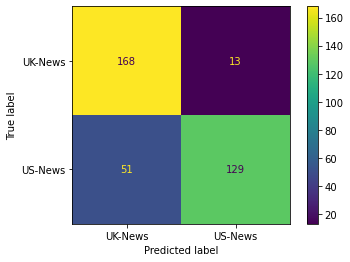

In [17]:
def plot_cm(test_targets, predicted_data):
    cm = confusion_matrix(test_targets, predicted_data)
    cmd = ConfusionMatrixDisplay(cm, display_labels=list(np.unique(test_targets)))
    cmd.plot();
    return cmd
    
plot_cm(test_target, predicted)

As shown in the confusion matrix, the majority of the incorrect classifications were in the identification of US-News as UK-News, rather than the other way arround. This is also highlighted in the classification report below:

In [18]:
print(classification_report(test_target, predicted, target_names=target_names))

              precision    recall  f1-score   support

     UK-News       0.77      0.93      0.84       181
     US-News       0.91      0.72      0.80       180

    accuracy                           0.82       361
   macro avg       0.84      0.82      0.82       361
weighted avg       0.84      0.82      0.82       361



In order to investigate whether the tweaking of parts of the classification model could improve its performance, a pipeline was constructed. Certain additions to the model were made, including a lemmatizer imported from NLTK, and TF-IDF weighting using the TfidfTransformer function. A lemma tokenizer was first defined:

In [19]:
from nltk.stem import WordNetLemmatizer

def lemma_tokenizer(document):
    standard_tokenizer = CountVectorizer().build_tokenizer()
    all_tokens = standard_tokenizer(document)

    lemmatizer = WordNetLemmatizer()
    lemma_tokens = []
    
    for token in all_tokens:
        lemma_tokens.append(lemmatizer.lemmatize(token))
        
    return lemma_tokens

The binary classification pipeline was then constructed and used to run the predictions using the same test and training sets as before:

In [20]:
from sklearn.pipeline import Pipeline

binary_pipeline = Pipeline([
    ('vec', CountVectorizer(min_df=10, tokenizer=lemma_tokenizer)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=3))
])


binary_pipeline.fit(train_docs, train_target)
predicted = binary_pipeline.predict(test_docs)
print("Classification accuracy = %.4f" % accuracy_score(test_target, predicted))

Classification accuracy = 0.8837


A higher classification accuracy was achieved, with the large fraction of incorrectly identified UK-News articles no longer as prominent, as shown in the confusion matrix below:

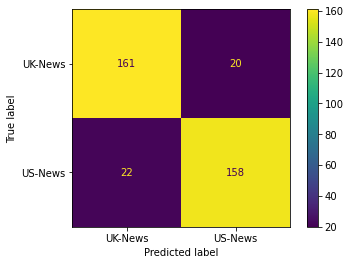

In [21]:
plot_cm(test_target, predicted)

Finally, the accuracy of the model when using different training and test ratios was also investigated.

In [22]:
def classify_accuracy(train_docs, test_docs, train_target, test_target, ratio):
    binary_pipeline.fit(train_docs, train_target)
    predicted = binary_pipeline.predict(test_docs)
    cmd = plot_cm(test_target, predicted)
    
    accuracy = accuracy_score(test_target, predicted)
    cmd.ax_.set_title('test size =%s, accuracy = %.4f' % (str(ratio), accuracy))
    return accuracy

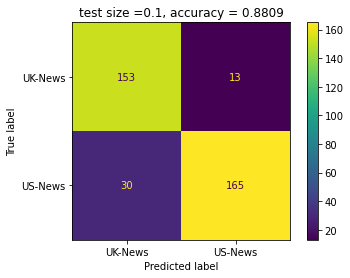

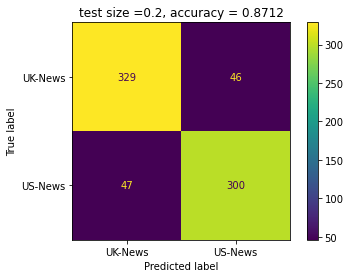

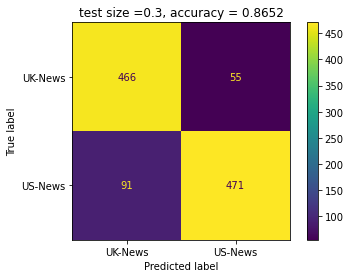

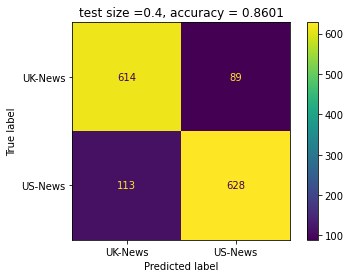

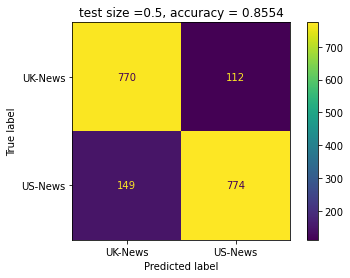

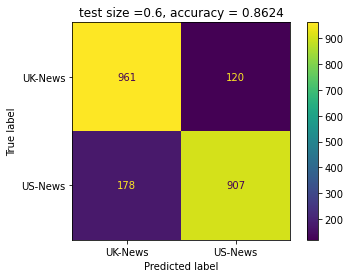

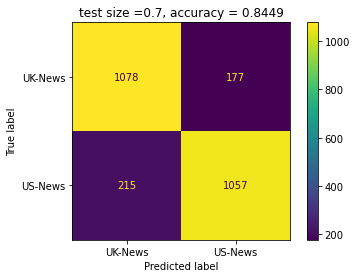

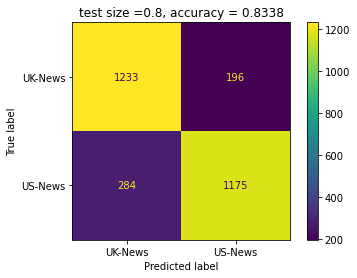

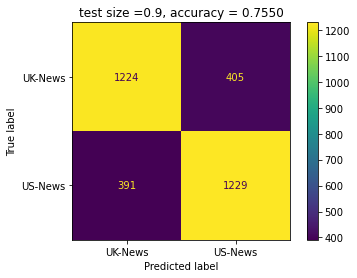

In [36]:
target, docs = extract_relevant_articles(news_data, 'UK-News', 'US-News')

accuracies = []
test_train_ratios = np.round(np.linspace(0.1,0.9,9),1)
for ratio in test_train_ratios:
    train_docs, test_docs, train_target, test_target = train_test_split(docs, target, test_size=ratio)
    accuracy = classify_accuracy(train_docs, test_docs, train_target, test_target, ratio)
    accuracies.append(accuracy)

The accuracy of the classification model was generally unchanged up to a ratio of 0.6, as shown below, where the accuracy decreased slightly. A ratio of 0.2 was hence chosen for the remaining anlysis.

Text(0.5, 0, 'Test-Train Set Ratio')

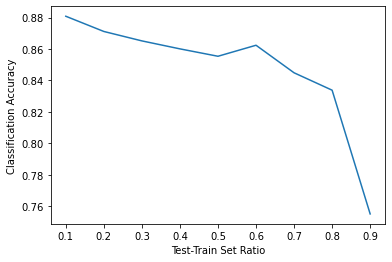

In [37]:
plt.plot(test_train_ratios, accuracies)
plt.ylabel('Classification Accuracy')
plt.xlabel('Test-Train Set Ratio')

The final investigation invloved the use of Cross Validation, where the entire dataset is split into a certain number, k, of 'folds', where k-1 folds are used as training data, and the remainder is used the test set, with the process repeated k times.

This was performed for k=5, conserving the 0.2 ratio mentioned above. The accuracies are displayed below, a the mean accuracy of just over 85%.

In [38]:
acc_scores = cross_val_score(binary_pipeline, docs, target, cv=5, scoring="accuracy")
k_acc_scores = pd.Series(acc_scores)

print(k_acc_scores)
print("Mean accuracy: %.4f" % k_acc_scores.mean())

0    0.875346
1    0.819945
2    0.831025
3    0.862881
4    0.890582
dtype: float64
Mean accuracy: 0.8560


This was then repeated for the two remaining pairs of news categories:

**US-News** and **Sport**

In [39]:
target, docs = extract_relevant_articles(news_data, 'US-News', 'Sport')

acc_scores = cross_val_score(binary_pipeline, docs, target, cv=5, scoring="accuracy")
k_acc_scores = pd.Series(acc_scores)

print(k_acc_scores)
print("Mean accuracy: %.4f" % k_acc_scores.mean())

0    0.910591
1    0.896836
2    0.881706
3    0.935351
4    0.913223
dtype: float64
Mean accuracy: 0.9075


**UK-News** and **Sport**

In [40]:
target, docs = extract_relevant_articles(news_data, 'UK-News', 'Sport')

acc_scores = cross_val_score(binary_pipeline, docs, target, cv=5, scoring="accuracy")
k_acc_scores = pd.Series(acc_scores)

print(k_acc_scores)
print("Mean accuracy: %.4f" % k_acc_scores.mean())

0    0.887967
1    0.889350
2    0.901798
3    0.907331
4    0.901662
dtype: float64
Mean accuracy: 0.8976


It was noticed that the classification model was slightly more accurate for the latter two category pairs. This makes sense as it would be expected that UK and US News articles, while different, would have more in common in terms of language, phrasing and subject matter than Sports news. Simply put, UK and US News articles are more difficult to distinguish for this model than with Sports articles.

### Task 2: Multi-Class Text Classification

For multi-class classification, the preprocessing steps required adjustments in order to accomodate three news categories simultaneously. A function was written to extract all 3 news category articles into document and target lists.

In [41]:
def extract_multiclass_articles(data, category0, category1, category2):
    targets = []
    documents = []
    for article in data:
        if article['Category'] in [category0, category1, category2]:
            documents.append(concatentate_strings(article['Title'], article['Snippet']))
            targets.append(article['Category'])
    return np.array(targets), documents

categories, documents = extract_multiclass_articles(news_data, 'UK-News', 'Sport', 'US-News')

The articles were split into test and training sets as before, with 20% testing.

In [42]:
train_docs, test_docs, train_target, test_target = train_test_split(documents, categories, test_size=0.2)

As classifying all three article categories at once will result in more points within the coordinate space, a larger value of 5 nearest neighbours was used to categorise the data, with the minimum token occurrence set to 5 documents, as there was likely to be more. The pipeline was used run to create the multi-class classification model, and used to predict the categories of the testing set. The model appeared to be quite effective, with an accuracy around 89-90%:

In [43]:
multi_class_pipeline = Pipeline([
    ('vec', CountVectorizer(min_df=5, tokenizer=lemma_tokenizer)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])


multi_class_pipeline.fit(train_docs, train_target)
predicted = multi_class_pipeline.predict(test_docs)
print("Classification accuracy = %.4f" % accuracy_score(test_target, predicted))

Classification accuracy = 0.9033


As shown in the confusion matrix below, the model successfully predicted a majority of the categories.

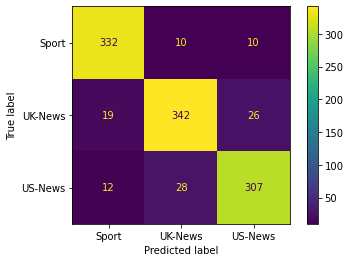

In [44]:
plot_cm(test_target, predicted)

In [45]:
print(classification_report(test_target, predicted, target_names=['UK-News', 'Sport', 'US-News']))

              precision    recall  f1-score   support

     UK-News       0.91      0.94      0.93       352
       Sport       0.90      0.88      0.89       387
     US-News       0.90      0.88      0.89       347

    accuracy                           0.90      1086
   macro avg       0.90      0.90      0.90      1086
weighted avg       0.90      0.90      0.90      1086



The individual accuracies of the model for predicting each individual category were also computed using the function below:

In [46]:
from collections import Counter, OrderedDict

def individual_accuracies(test_targets, predicted_data):
    cm = confusion_matrix(test_targets, predicted_data)
    corrects = np.diag(cm)
    totals = np.asarray(list(Counter(test_targets).values()))
    accuracies = np.array(corrects) / totals
    categories = list(Counter(test_targets).keys())
    results = dict(zip(categories, accuracies))
    return dict(sorted(results.items()))
individual_accuracies(test_target, predicted)

{'Sport': 0.9431818181818182,
 'UK-News': 0.8837209302325582,
 'US-News': 0.8847262247838616}

As shown above, the accuracy of the model in predicting articles as both UK- and US-News is quite a bit lower than for the sport category. In order to determine if this was a consistent feature, the process was repeated five times, with different training and test allocations.

In [47]:
for i in range(5):
    train_docs, test_docs, train_target, test_target = train_test_split(documents, categories, test_size=0.2)
    
    multi_class_pipeline.fit(train_docs, train_target)
    predicted = multi_class_pipeline.predict(test_docs)
    accuracies = individual_accuracies(test_target, predicted)
    print(accuracies)

{'Sport': 0.8413597733711048, 'UK-News': 0.8363171355498721, 'US-News': 0.9824561403508771}
{'Sport': 0.7962962962962963, 'UK-News': 0.9559228650137741, 'US-News': 0.9043478260869565}
{'Sport': 0.8756906077348067, 'UK-News': 0.9418282548476454, 'US-News': 0.859504132231405}
{'Sport': 0.9032258064516129, 'UK-News': 0.8715083798882681, 'US-News': 0.8876404494382022}
{'Sport': 0.8415300546448088, 'UK-News': 0.8870056497175142, 'US-News': 0.9262295081967213}


Clearly these accuracies fluctuate randomly depending on the training and test sets chosen, and so the lower accuracy of UK/US-News identification is not inherent to the model.

Finally, Cross Validation was run on the model, with a total accuracy of approximately 85% found.

In [48]:
acc_scores = cross_val_score(multi_class_pipeline, documents, categories, cv=5, scoring="accuracy")
k_acc_scores = pd.Series(acc_scores)

print(k_acc_scores)
print("Mean accuracy: %.4f" % k_acc_scores.mean())

0    0.872007
1    0.825046
2    0.846225
3    0.860958
4    0.870968
dtype: float64
Mean accuracy: 0.8550
